# Factorial

En estos apuntes se observará como implementar el factorial de distintas formas, y como cada implementación tiene un impacto en su tiempo de ejecución.

## Primera aproximación

La definición del factorial es
$$
n! = 1 \times 2 \times 3 \times 4 \cdots \times n
$$
Se realizará un ejercicio de reordenamiento de términos para conseguir formas más eficientes en términos de cómputo

In [1]:
def fact_v1(k):
    f = 1
    for i in range(1,k+1):
        f *= i
    return f

## Segunda aproximación

Para $n = 4$:
$$
4! = 1 \times 2 \times 3 \times 4 = (1 \times 3)(2 \times 4) = (1 \times 3)((2 \times 1)(2 \times 2)) = (1 \times 3) \times 2^{2} \times 2!
$$

Para $n = 5$:
$$
5! = 1 \times 2 \times 3 \times 4 \times 5 = (1 \times 3 \times 5)(2 \times 4) = (1 \times 3 \times 5)((2 \times 1)(2 \times 2)) = (1 \times 3 \times 5) \times 2^{2} \times 2!
$$

Para $n = 6$:
$$
6! = 1 \times 2 \times 3 \times 4 \times 5 \times 6 = (1 \times 3 \times 5)(2 \times 4 \times 6) = (1 \times 3 \times 5)((2 \times 1)(2 \times 2)(2 \times 3)) = (1 \times 3 \times 5) \times 2^{3} \times 3!
$$

Para $n = 7$:
$$
7! = 1 \times 2 \times 3 \times 4 \times 5 \times 6 \times 7 = (1 \times 3 \times 5 \times 7)(2 \times 4 \times 6) = (1 \times 3 \times 5 \times 7)((2 \times 1)(2 \times 2)(2 \times 3)) = (1 \times 3 \times 5 \times 7) \times 2^{3} \times 3!
$$

En general:
$$
n! = (1 \times 3 \times 5 \cdots)(2^{n \div 2})(n \div 2!)
$$

Notar que el primer producto son los impares menores o iguales a $n$, y que $\div$ es el símbolo de la división entera.

In [2]:
def fact_v2(k):
    f = 1
    t = k//2
    n = (k+1)//2
    for i in range(1,2*n,2):
        f *= i
    p = 2 ** t
    return f*p*fact_v1(t)

Está forma hace uso de la primera versión, en estos apuntes no se hará de recursividad.

## Tercera aproximación

Para $n = 8$:

$$
8! = (1 \times 3 \times 5 \times 7)(2 \times 4 \times 6 \times 8) = (1 \times 3 \times 5 \times 7)((2 \times 1)(2 \times 2)(2 \times 3)(2 \times 4)) = (1 \times 3 \times 5 \times 7) \times 2^{4} \times 4! 
$$

Al reemplazar el resultado de $4!$:
$$
8! = (1 \times 3 \times 5 \times 7) \times 2^{4} \times 4! = (1 \times 3 \times 5 \times 7) \times 2^{4} \times ((1 \times 3) \times 2^{2} \times 2!)
$$

Después de ordenar:

$$
8! = (1 \times 3 \times 5 \times 7)(1 \times 3)\times 2^{4} \times 2^{2} \times 2!
$$

Si le damos forma a $2! = 1 \times 2^{1} \times 1!$ queda:

$$
8! = (1 \times 3 \times 5 \times 7)(1 \times 3)(1) \times 2^{4} \times 2^{2} \times 2^{1} \times 1!
$$

Para $n = 9$:

$$
9! = (1 \times 3 \times 5 \times 7 \times 9)(2 \times 4 \times 6 \times 8) = (1 \times 3 \times 5 \times 7 \times 9)((2 \times 1)(2 \times 2)(2 \times 3)(2 \times 4)) = (1 \times 3 \times 5 \times 7 \times 9) \times 2^{4} \times 4! 
$$

Al reemplazar el resultado de $4!$:
$$
9! = (1 \times 3 \times 5 \times 7 \times 9) \times 2^{4} \times 4! = (1 \times 3 \times 5 \times 7 \times 9) \times 2^{4} \times ((1 \times 3) \times 2^{2} \times 2!)
$$

Nos queda:

$$
9! = (1 \times 3 \times 5 \times 7 \times 9)(1 \times 3)(1) \times 2^{4} \times 2^{2} \times 2^{1} \times 1!
$$

Si agrupamos:

$$
9! = \underbrace{(1 \times 3 \times 5 \times 7 \times 9)(1 \times 3)(1)}_\text{a} \times \underbrace{2^{4} \times 2^{2} \times 2^{1}}_\text{b} \times 1!
$$

La expresión simbólica sería de el término $a$ sería:

$$
a = \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,9\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,9\div2\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,9\div4\right]$}
$$

La expresión simbólica sería de el término $b$ sería:

$$
b = 2^{9 \div 2} \times 2^{9 \div 4} \times 2^{9 \div 8}
$$

En general:

$$
a = \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,n\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,n\div2\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,n\div4\right]$} \times \cdots
$$

y:

$$
b = 2^{n \div 2} \times 2^{n \div 4} \times 2^{n \div 8} \times \cdots
$$

Y el factorial de cualquier número sería:

$$
n! = a \times b
$$

In [3]:
def fact_v3(k):
    a = 1
    b = 1
    while (k):
        ai = 1
        t = k//2
        n = (k+1)//2
        for i in range(1,2*n,2):
            ai *= i
        a *= ai
        b *= (2 ** t)
        k = t
    return a*b

El término $b$ se puede reemplazar por una única potencia de una suma de exponentes

In [4]:
def fact_v4(k):
    a = 1
    e = 0
    while (k):
        ai = 1
        t = k//2
        n = (k+1)//2
        for i in range(1,2*n,2):
            ai *= i
        a *= ai
        e += t
        k = t
    b = 2**e
    return a*b

Al ser una potencia de 2 se puede hacer otro cambio

In [5]:
def fact_v5(k):
    a = 1
    e = 0
    while (k):
        ai = 1
        t = k//2
        n = (k+1)//2
        for i in range(1,2*n,2):
            ai *= i
        a *= ai
        e += t
        k = t
    b = (2<<(e-1))
    return a*b

## Filtro mediana

In [6]:
import statistics

def filtro_mediana(sign, ventana):
    signc = []
    tam = len(sign)
    offs = int((ventana-1)/2)
    for i in range(tam):
        inicio = i - offs if (i - offs > 0) else i
        fin = i + offs if (i + offs < tam) else tam
        signc.append(statistics.median(sign[inicio:fin]))
    return signc

## Pruebas

In [7]:
r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
start = 1000
end = 10000
step = start
nums = range(start,end+start,step)
for num in nums:
    r1.append(fact_v1(num))
    r2.append(fact_v2(num))
    r3.append(fact_v3(num))
    r4.append(fact_v4(num))
    r5.append(fact_v5(num))

In [8]:
r1 == r2 == r3 == r4 == r5

True

Los resultados numpericos son iguales en todas las versiones, para todos los tamagnos.

In [9]:
import time

In [10]:
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
start = 1000
end = 10000
step = start
nums = range(start,end+start,step)
veces = 25
for num in nums:
    v1i = []
    v2i = []
    v3i = []
    v4i = []
    v5i = []
    for i in range(veces):
        tic = time.time()
        fact_v1(num)
        toc = time.time()
        v1i.append(toc - tic)
        
        tic = time.time()
        fact_v2(num)
        toc = time.time()
        v2i.append(toc - tic)
        
        tic = time.time()
        fact_v3(num)
        toc = time.time()
        v3i.append(toc - tic)
        
        tic = time.time()
        fact_v4(num)
        toc = time.time()
        v4i.append(toc - tic)
        
        tic = time.time()
        fact_v5(num)
        toc = time.time()
        v5i.append(toc - tic)
    v1.append(statistics.mean(filtro_mediana(v1i, 11)))
    v2.append(statistics.mean(filtro_mediana(v2i, 11)))
    v3.append(statistics.mean(filtro_mediana(v3i, 11)))
    v4.append(statistics.mean(filtro_mediana(v4i, 11)))
    v5.append(statistics.mean(filtro_mediana(v5i, 11)))

### Tiempo promedio

In [11]:
import matplotlib.pyplot as plt

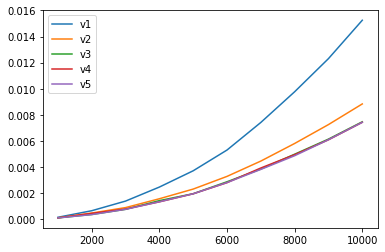

In [12]:
plt.plot(nums,v1,label='v1')
plt.plot(nums,v2,label='v2')
plt.plot(nums,v3,label='v3')
plt.plot(nums,v4,label='v4')
plt.plot(nums,v5,label='v5')
plt.legend()

No se observa una ganancia significativa entre las versiones 3, 4 y 5

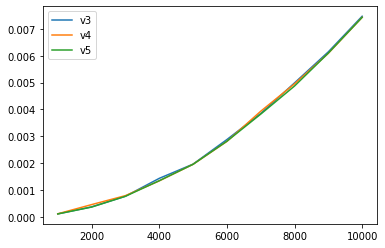

In [13]:
plt.plot(nums,v3,label='v3')
plt.plot(nums,v4,label='v4')
plt.plot(nums,v5,label='v5')
plt.legend()

### Speedup

In [14]:
spv2 = [v1[i]/v2[i] for i in range(len(v1))]
spv3 = [v1[i]/v3[i] for i in range(len(v1))]
spv4 = [v1[i]/v4[i] for i in range(len(v1))]
spv5 = [v1[i]/v5[i] for i in range(len(v1))]

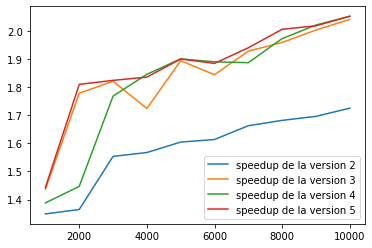

In [15]:
plt.plot(nums,spv2,label='speedup de la version 2')
plt.plot(nums,spv3,label='speedup de la version 3')
plt.plot(nums,spv4,label='speedup de la version 4')
plt.plot(nums,spv5,label='speedup de la version 5')
plt.legend()

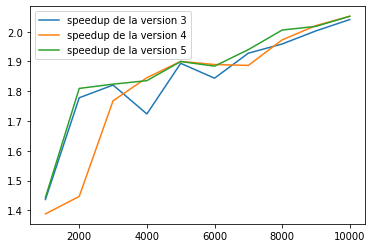

In [16]:
plt.plot(nums,spv3,label='speedup de la version 3')
plt.plot(nums,spv4,label='speedup de la version 4')
plt.plot(nums,spv5,label='speedup de la version 5')
plt.legend()

La quinta forma parece ser, en términos generales, la opción ideal. 